<a href="https://colab.research.google.com/github/Ketaki-conda/Conda/blob/master/Weather-Prediction-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weather Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Analysis

- **The closer you are to the Equator the warmer the weather:** As we can see in the ScatterPlot "City Latitude vs Temperature", the closer you are to the equator the warmer the weather is. Also because we are on January, it is winter season (at least in the north part of the planet) the weather is significanlty colder.. having cities below -40 C.
- **No obvious relationship between Latitude vs Humidity or Latitude vs Cloudiness** It seems that there is no relationship between Latitude vs Humidity or Latitude vs Cloudiness. Humidity and Cloudiness can be affected by many variables like whether the city is close to the sea, if there is some meteorological event close to a city, or even some random weather conditions going on. 
- **Windy places seem to be in the North** There is no obvious relationship between Wind Speed and Latitude, however it seems that there are some cities in the North that have high wind speeds. This might or might not be related to the weather. It can also be related to special conditions on those places.

---

In [3]:
!pip install citipy

     |████████████████████████████████| 557 kB 4.0 MB/s 
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559700 sha256=46f76cd147c16305f4eabee8a5bd000dd71ff20ea71e173833d1d092b372f52a
  Stored in directory: /root/.cache/pip/wheels/72/ae/63/5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [4]:
!pip install requests

### Import Dependencies

In [5]:
#import dependencies

import random
import requests
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib as mpl

from citipy import citipy

import numpy as np

### Import of Country catalog 

ISO 3166 Countries with Regional Codes (https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes)

In [6]:

countries_catalog = pd.read_csv("drive/MyDrive/Colab Notebooks/weather-data-analysis/Resources/ISO-3166-Countries-with-Regional-Codes.csv",encoding='utf-8', keep_default_na=False)
## added keep_default_na=False  because 'NA' country code was interpreted as NaN value instead of Namibia 

countries_catalog = countries_catalog[['name','alpha-2']]

countries_catalog.columns = ['country_name', 'country_code']

countries_catalog.head()

,country_name,country_code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


In [7]:
countries_catalog.count()

country_name    249
country_code    249
dtype: int64

In [8]:
#name = countries_catalog[(countries_catalog.country_code == 'AX')]['country_name']

name = countries_catalog[ countries_catalog["country_code"] == "NA" ].values.tolist()[0][0]

print(name)

Namibia


### Random latitudes

- Range Latitudes: -90 to +90
- Range Longitudes: -180 to +180

In [9]:
coord_list = []

#Generate 600 random lats and lons

ix = 0
jx = 100
#jx = 2

while(ix<36):
    
    range1 = -90 + (ix*5)
    range2 = range1 + 5 
    
    range3 = -180
    range4 = 180
    
    print(f'#### {ix}) Get {jx} random Lats from {range1}, {range2} and random Long from {range3}, {range4}')
    
    for i in range(jx):
        
        rand_lat = round( random.uniform(range1, range2) , 5) 
        rand_lon = round( random.uniform(range3, range4) , 5) 

        tmp = (rand_lat,rand_lon)
        coord_list.append(tmp)
    
    ix += 1

print(f'Coords: {len(coord_list)}')

#### 0) Get 100 random Lats from -90, -85 and random Long from -180, 180
#### 1) Get 100 random Lats from -85, -80 and random Long from -180, 180
#### 2) Get 100 random Lats from -80, -75 and random Long from -180, 180
#### 3) Get 100 random Lats from -75, -70 and random Long from -180, 180
#### 4) Get 100 random Lats from -70, -65 and random Long from -180, 180
#### 5) Get 100 random Lats from -65, -60 and random Long from -180, 180
#### 6) Get 100 random Lats from -60, -55 and random Long from -180, 180
#### 7) Get 100 random Lats from -55, -50 and random Long from -180, 180
#### 8) Get 100 random Lats from -50, -45 and random Long from -180, 180
#### 9) Get 100 random Lats from -45, -40 and random Long from -180, 180
#### 10) Get 100 random Lats from -40, -35 and random Long from -180, 180
#### 11) Get 100 random Lats from -35, -30 and random Long from -180, 180
#### 12) Get 100 random Lats from -30, -25 and random Long from -180, 180
#### 13) Get 100 random Lats from -25, -20 and r

### Get the cities

These have to be at least 500 unique cities

In [10]:
cities = []

for coord in coord_list:
    
    city = citipy.nearest_city(coord[0],coord[1])
    city_name = city.city_name
    country_code = city.country_code

    if (country_code.upper() == 'AN'):
        country_code = 'BQ'
        print('Changed AN for BQ (AN was deleted from the ISO in 2010)')

    try:
        country_name = countries_catalog[ countries_catalog["country_code"] == country_code.upper() ].values.tolist()[0][0]
    except:
        print(f'Not found in catalog {country_code.upper()}')
        country_name = ''
    
    #print(f'processing #  City Name: {city_name} - Country Code: {country_code}')
    
    tmp = (city_name, country_code, country_name)
    cities.append(tmp)

In [11]:
len(cities)

3600

In [12]:
unique_cities = list(set(cities))

In [13]:
len(unique_cities)

1163

### Data Retrival

OpenWeatherMap - Weather API

In [14]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = "685d95dfa84c1b2cd6e6d9e2a8565941"
# Build partial query URL
query_url_tmp = f'{url}appid={api_key}&units={units}&'


In [15]:
#coord_list = [(lat,lon)]
city_name_list = []
country_code_lsit = []
country_name_list = []

lon_api_list = []
lat_api_list = []
temp_list = []
humidity_list = []
wind_list = []
clouds = []
country_api = []
city_id_api = []
city_api = []

i = 0

# Loop through the list of cities and perform a request for data on each
for cities in unique_cities:
    
    i += 1
    print(f'[#######] {i}: Place: {cities[0].capitalize()}, {cities[2].capitalize()}')
    
    query_url = query_url_tmp + f'q={cities[0].capitalize()},{cities[1]}'
    
    #print(query_url) #do not print when pushing to github
    try:
        response = requests.get(query_url).json()
        response['sys']['country']
    except:
        print(f'[#######] PLACE NOT FOUND: {cities[0].capitalize()}, {cities[2].capitalize()}')
        continue
    
    city_name_list.append(cities[0].capitalize())
    country_code_lsit.append(cities[1].upper())
    country_name_list.append(cities[2].capitalize())
    
    lon_api_list.append(response['coord']['lon'])
    lat_api_list.append(response['coord']['lat'])
    temp_list.append(response['main']['temp'])
    humidity_list.append(response['main']['humidity'])
    wind_list.append(response['wind']['speed'])
    clouds.append(response['clouds']['all'])
    country_api.append(response['sys']['country'])
    city_id_api.append(response['id'])
    city_api.append(response['name'])
    
    #print(response)


[#######] 1: Place: San isidro, Philippines
[#######] 2: Place: Bhuj, India
[#######] 3: Place: Paucartambo, Peru
[#######] PLACE NOT FOUND: Paucartambo, Peru
[#######] 4: Place: Poum, New caledonia
[#######] 5: Place: Benemerito de las americas, Mexico
[#######] 6: Place: Kastamonu, Turkey
[#######] 7: Place: Ruzhyn, Ukraine
[#######] 8: Place: Bafra, Turkey
[#######] 9: Place: Cherskiy, Russian federation
[#######] 10: Place: Lompoc, United states of america
[#######] 11: Place: Kutum, Sudan
[#######] 12: Place: Shaoguan, China
[#######] 13: Place: Careiro da varzea, Brazil
[#######] 14: Place: Collingwood, Canada
[#######] 15: Place: Danielskuil, South africa
[#######] 16: Place: Hervey bay, Australia
[#######] 17: Place: Abu zabad, Sudan
[#######] 18: Place: Pacific grove, United states of america
[#######] 19: Place: Hilo, United states of america
[#######] 20: Place: Blytheville, United states of america
[#######] 21: Place: San carlos, Colombia
[#######] 22: Place: Bogatyye saby

In [16]:
# Cities found on the WeatherAPI

len(city_api)

1046

### Pandas Dataframe creation

In [17]:
weather_data = pd.DataFrame(
                {'City_citipy': city_name_list,
                'Country_code_citipy': country_code_lsit,
                 'Country_Name_ISO': country_name_list,
                'City_ID': city_id_api,
                'City': city_api,
                'Country': country_api,
                'Longitude': lon_api_list,
                'Latitude': lat_api_list,
                'Temperature': temp_list,
                'Humidity': humidity_list,
                'Wind': wind_list,
                'Clouds': clouds
                })


weather_data.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
0,San isidro,PH,Philippines,1689663,San Isidro,PH,120.8175,15.0199,31.76,72,1.11,70
1,Bhuj,IN,India,1275812,Bhuj,IN,69.6667,23.2667,30.33,61,3.33,6
2,Poum,NC,New caledonia,2138555,Poum,NC,164.0167,-20.2333,23.40,66,3.90,4
3,Benemerito de las americas,MX,Mexico,3816362,Benemérito de las Américas,MX,-90.6439,16.5167,23.50,92,0.36,100
4,Kastamonu,TR,Turkey,743881,Kastamonu Province,TR,33.6667,41.5000,9.92,81,0.66,60


In [ ]:
weather_data.count()

City_citipy            1040
Country_code_citipy    1040
Country_Name_ISO       1040
City_ID                1040
City                   1040
Country                1040
Longitude              1040
Latitude               1040
Temperature            1040
Humidity               1040
Wind                   1040
Clouds                 1040
dtype: int64

---

### Export Data Frame to CSV

In [18]:
file_name = '/content/drive/MyDrive/weather_data.csv'

weather_data.to_csv(file_name, encoding='utf-8', index=False)

---

#### Loading the CSV
Run this part just when you want to keep wirking with the exact same datasad saved.
- This is because when you close a project.. the data obtained throug the api gets deleted from memory and you'll have to re-run the **random** process again: It will get you different cities

In [19]:
file_name = '/content/drive/MyDrive/weather_data.csv'

weather_data_csv = pd.read_csv(file_name)
weather_data_csv.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
0,San isidro,PH,Philippines,1689663,San Isidro,PH,120.8175,15.0199,31.76,72,1.11,70
1,Bhuj,IN,India,1275812,Bhuj,IN,69.6667,23.2667,30.33,61,3.33,6
2,Poum,NC,New caledonia,2138555,Poum,NC,164.0167,-20.2333,23.40,66,3.90,4
3,Benemerito de las americas,MX,Mexico,3816362,Benemérito de las Américas,MX,-90.6439,16.5167,23.50,92,0.36,100
4,Kastamonu,TR,Turkey,743881,Kastamonu Province,TR,33.6667,41.5000,9.92,81,0.66,60


In [20]:
#name = weather_data_csv[ weather_data_csv["country_code"] == "NA" ].values.tolist()[0][0]

conditions = [
    (weather_data_csv['Temperature'] < -10), #darkturquoise
    (weather_data_csv['Temperature'] >= -10) & (weather_data_csv['Temperature'] < 0), #blue
    (weather_data_csv['Temperature'] >= 0) & (weather_data_csv['Temperature'] < 10), #lightblue
    (weather_data_csv['Temperature'] >= 10) & (weather_data_csv['Temperature'] < 25),#white
    (weather_data_csv['Temperature'] >= 22) & (weather_data_csv['Temperature'] < 30),#coral
    (weather_data_csv['Temperature'] >= 30)] # red
 
choices = ['darkblue', 'aquamarine','lightblue', 'white','coral', 'red', ]

weather_data_csv['color'] = np.select(conditions, choices, default='black')



In [21]:
weather_data_csv.head()

,City_citipy,Country_code_citipy,Country_Name_ISO,City_ID,City,Country,Longitude,Latitude,Temperature,Humidity,Wind,Clouds,color
0,San isidro,PH,Philippines,1689663,San Isidro,PH,120.8175,15.0199,31.76,72,1.11,70,red
1,Bhuj,IN,India,1275812,Bhuj,IN,69.6667,23.2667,30.33,61,3.33,6,red
2,Poum,NC,New caledonia,2138555,Poum,NC,164.0167,-20.2333,23.40,66,3.90,4,white
3,Benemerito de las americas,MX,Mexico,3816362,Benemérito de las Américas,MX,-90.6439,16.5167,23.50,92,0.36,100,white
4,Kastamonu,TR,Turkey,743881,Kastamonu Province,TR,33.6667,41.5000,9.92,81,0.66,60,lightblue


### Charting

- Temperature (F) vs. Latitude
- Humidity (%) vs. Latitude
- Cloudiness (%) vs. Latitude
- Wind Speed (mph) vs. Latitude

##### Longitude vs Latitude

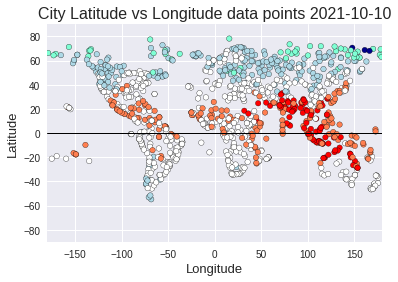

In [22]:
import datetime
x = weather_data_csv['Longitude'].values
y = weather_data_csv['Latitude'].values
c =  weather_data_csv['color'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=1, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Longitude data points ' + str(datetime.date.today()), fontsize=16)
plt.xlabel('Longitude', fontsize=13)
plt.ylabel('Latitude', fontsize=13)
plt.xlim(-180, 180) 
plt.ylim(-90, 90) 
plt.axhline(0, color='black', lw=1)

plt.show()
#plt.savefig('output/00_Latitude_vs_Longitude_data_points_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Temperature

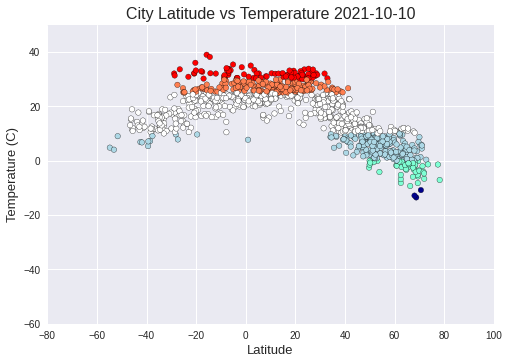

In [23]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Temperature'].values
c = weather_data_csv['color'].values

plt.figure()

mpl.style.use('seaborn')
plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=1, s = 30)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Temperature '+ str(datetime.date.today()), fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Temperature (C)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-60, 50) 

plt.show()
#plt.savefig('output/01_City_Latitude_vs_Temperature_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Humidity

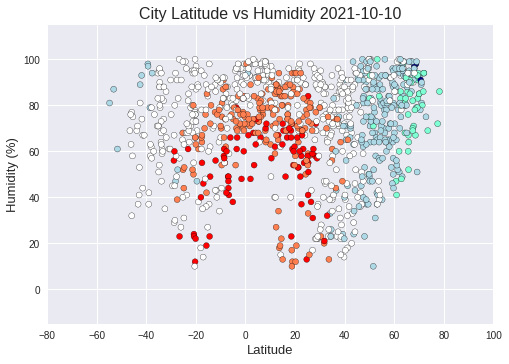

In [24]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Humidity'].values
c = weather_data_csv['color'].values


#for i in range(len(y)):
#    if y[i]>100:
#        print(y[i])
        #y[i] = 100

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=1, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Humidity '+ str(datetime.date.today()), fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Humidity (%)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-15, 115) 

mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/02_City_Latitude_vs_Humidity_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Cloudiness

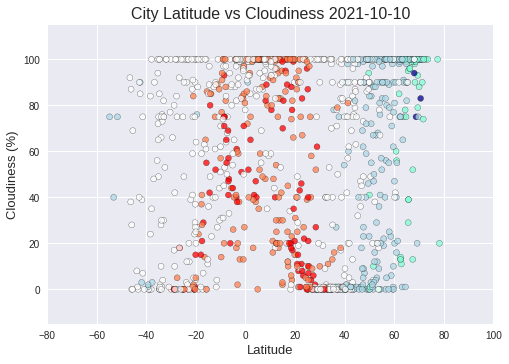

In [25]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Clouds'].values
c = weather_data_csv['color'].values


#for i in range(len(y)):
#    if y[i]>100:
#        print(y[i])
        #y[i] = 100

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Cloudiness ' + str(datetime.date.today()), fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Cloudiness (%)', fontsize=13)
plt.xlim(-80, 100) 
plt.ylim(-15, 115) 
mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/03_City_Latitude_vs_Cloudiness_v2.png', bbox_inches="tight")

plt.close() 

##### Latitude vs Wind Speed

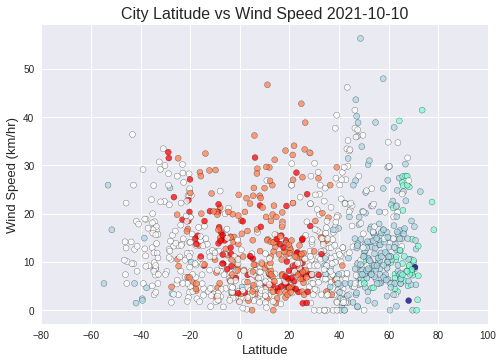

In [26]:
x = weather_data_csv['Latitude'].values
y = weather_data_csv['Wind'].values*3.6
c = weather_data_csv['color'].values

fig = plt.figure()

plt.scatter(x, y, marker="o", c = c, edgecolors="black", alpha=0.75, s = 35)

plt.grid(color='w', linestyle='-', linewidth=1)
plt.title('City Latitude vs Wind Speed ' + str(datetime.date.today()), fontsize=16)
plt.xlabel('Latitude', fontsize=13)
plt.ylabel('Wind Speed (km/hr)', fontsize=13)
plt.xlim(-80, 100) 
#plt.ylim(-3, 50) 

mpl.style.use('seaborn')

plt.show()
#plt.savefig('output/04_City_Latitude_vs_Wind_Speed_v2.png', bbox_inches="tight")

plt.close() 

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import RobustScaler
import csv
import datetime
from sklearn.svm import SVR
import sklearn.svm as svm
from sklearn.linear_model import LinearRegression

---

In [28]:
url = "drive/MyDrive/Colab Notebooks/weather-data-analysis/Resources/mumbai_temperature.csv"
data = pd.read_csv(url)
data.head()

,CITY,DATE,TAVG,TMAX,TMIN
0,"BOMBAY SANTACRUZ, IN",01-01-2000,25.4,33.9,NaN
1,"BOMBAY SANTACRUZ, IN",02-01-2000,26.3,33.5,18.6
2,"BOMBAY SANTACRUZ, IN",03-01-2000,25.9,33.4,NaN
3,"BOMBAY SANTACRUZ, IN",04-01-2000,25.9,33.0,17.5
4,"BOMBAY SANTACRUZ, IN",05-01-2000,26.3,33.0,18.0


In [29]:
def train_data():
    y = data.TAVG
    X = data.DATE
    new_dates = []
    for date in X:
        date = datetime.datetime.strptime(date, "%d-%m-%Y")
        date2 = (date - datetime.datetime(1970,1,1)).total_seconds()
        new_dates.append(date2)
    data1 = np.array(new_dates)
    
    X.DATE = data1.reshape(-1,1)
 
    X_train, X_test, y_train, y_test = train_test_split(X.DATE, y,
                                                        test_size=0.5, 
                                                        random_state=123, 
                                                        )
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
 
    #pipeline = make_pipeline(preprocessing.StandardScaler(), 
     #                    RandomForestRegressor(n_estimators=100))
    #hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
     #             'randomforestregressor__max_depth': [None, 5, 3, 1], }

    clf = LinearRegression()
    clf.fit(X_train, y_train)
    #print(X_test)
    pred = clf.predict(X_test)
    print (r2_score(y_test, pred))
    #print (mean_squared_error(y_test, pred))
    joblib.dump(clf, 'weather_predictor.pkl')

In [30]:
train_data()

0.03912920723259983


In [31]:
def predict_weather():
    clf = joblib.load('weather_predictor.pkl')
    print("*" *55)
    print("Enter the details of the date you would like to predict")
    print("\n")
    option = input("Day number (00): ")
    year = option
    option = input("Month number (00): ")
    month = option
    option = input("Year: ")
    theday = option

    day = str(year) + "-" + str(month) + "-" + str(theday)
    day = datetime.datetime.strptime(day, "%d-%m-%Y")
    date = (day - datetime.datetime(1970,1,1)).total_seconds()

    X = [[date]]
    print("\n")
    print("-" * 49)
    value = clf.predict(X)[0]
    print("The temperature is predicted to be: " + str('{0:.2f}'.format(value)) + "°C")
    print("-" * 49)
    print("\n")
    
predict_weather()

*******************************************************
Enter the details of the date you would like to predict


Day number (00): 10
Month number (00): 10
Year: 2021


-------------------------------------------------
The temperature is predicted to be: 28.57°C
-------------------------------------------------


